# Pandas `DataFrame`s

## 1 `DataFrame`s: Basics and Creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Pandas `DataFrame` Objects

The `pd.DataFrame` class provides a data structure to handle 2-dimensional tabular data. `DataFrame`  objects are *size-mutable* and can contain mixed datatypes (e.g. `float`, `int` or `str`). All data columns inside a `DataFrame` share the same `index`.

#### 1.1.1 Creating `DataFrame`s

In [2]:
name = ["person 1", "person 2", "person 3"]
age = [23, 27, 34]

Create nested list with zip and pass column names:

In [3]:
df = pd.DataFrame(data=zip(name, age), columns=["Name", "Age"])
df

,Name,Age
0,person 1,23
1,person 2,27
2,person 3,34


Create with `dict`. Keys will be column names:

In [4]:
df = pd.DataFrame(data={"Name": name, "Age": age})
df

,Name,Age
0,person 1,23
1,person 2,27
2,person 3,34


Create from ndarray (then all columns of same type):

In [5]:
df = pd.DataFrame(data=np.random.random((4, 3)), columns=list("abc"))
df

,a,b,c
0,0.740440,0.206642,0.226793
1,0.013443,0.382789,0.172677
2,0.098666,0.517862,0.531629
3,0.797022,0.937961,0.142902


Let's create two dicts:

In [6]:
math_grades_dict = {
    'student1': 15,
    'student2': 11,
    'student3': 9,
    'student4': 13,
    'student5': 12,
    'student6': 7,
    'student7': 14,
}
chemistry_grades_dict = {
    'student1': 10,
    'student2': 14,
    'student3': 12,
    'student4': 8,
    'student5': 11,
    'student6': 10,
    'student7': 12,
    "student8": 5,  # <-- note the additional entry here
}

Convert them to Series Objects:

In [7]:
series_math = pd.Series(math_grades_dict)
series_chemistry = pd.Series(chemistry_grades_dict)
print(series_chemistry.index)

Index(['student1', 'student2', 'student3', 'student4', 'student5', 'student6',
       'student7', 'student8'],
      dtype='object')


Now use the two Series Objects to create a Dataframe:

In [8]:
df = pd.DataFrame(
    data={'math grades': series_math, 'chemistry grades': series_chemistry}
)
df

,math grades,chemistry grades
student1,15.0,10
student2,11.0,14
student3,9.0,12
student4,13.0,8
student5,12.0,11
student6,7.0,10
student7,14.0,12
student8,NaN,5


#### 1.1.2 What characterizes a `DataFrame` object?

In [9]:
# Attribute giving us the `shape` of the `DataFrame`. Similar to `np.array`.
df.shape

(8, 2)

In [10]:
# A method providing infos on the `DataFrame` and the data contained inside.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, student1 to student8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   math grades       7 non-null      float64
 1   chemistry grades  8 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 192.0+ bytes


In [11]:
# Get some statistics.
df.describe()

,math grades,chemistry grades
count,7.000000,8.000000
mean,11.571429,10.250000
std,2.819997,2.764572
min,7.000000,5.000000
25%,10.000000,9.500000
50%,12.000000,10.500000
75%,13.500000,12.000000
max,15.000000,14.000000


`DataFrame`s are essentially composed of 3 components. Theses components can be accessed with specific data attributes.

- Index (`df.index`)
- Columns (`df.columns`)
- Body (`df.values`)

Index and Body like `Series`

In [12]:
df.index

Index(['student1', 'student2', 'student3', 'student4', 'student5', 'student6',
       'student7', 'student8'],
      dtype='object')

In [13]:
df.columns

Index(['math grades', 'chemistry grades'], dtype='object')

In [14]:
df.values.nbytes, df.index.nbytes

(128, 64)

In [15]:
df.dtypes

math grades         float64
chemistry grades      int64
dtype: object

One can call `head()` (or `tail()`) first, when having loaded data into a `DataFrame`.
It is useful for checking if all data columns were loaded successfully.
It will print the first (last) 5 columns of the `DataFrame`.

In [16]:
df.head()

# Compare the `tail()` method
# df.tail()

,math grades,chemistry grades
student1,15.0,10
student2,11.0,14
student3,9.0,12
student4,13.0,8
student5,12.0,11


#### 1.1.3 Data Indexing and Selection

Download IRIS dataset:

In [17]:
#df = pd.read_csv(
#    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#    names=["sepal length", "sepal width", "petal length", "petal width", "Name"],
#)

df = pd.read_csv('iris.data', names=["sepal length", "sepal width", "petal length", "petal width", "Name"])

Quick check if data looks alright: (petal - Bluetenblatt, sepal - Kelchblatt)

In [18]:
df.head()
#df.info()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Each column is a `Series` object and can be accessed like with a Python dictionary

In [19]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'Name'], dtype='object')

In [20]:
df['Name']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

In [21]:
type(df["Name"])

pandas.core.series.Series

Accessing multiple columns at once:

In [22]:
df_sepal = df[["sepal length", 'sepal width']]
df_sepal.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Select rows with boolean mask. In this case all columns will be returned:

In [23]:
df[ df["Name"] == "Iris-setosa" ].head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df["Name"] == "Iris-setosa"  # the boolean expression inside the [] is a `Series` object

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Name, Length: 150, dtype: bool

Let's try to visualize the data. First specify color encoding of the different flower species:

In [25]:
name_to_color = {
    'Iris-setosa': "lightblue",
    'Iris-versicolor': "darkred",
    'Iris-virginica': "orange",
}

And make a plot:

In [26]:
def structured_multigrid_plot(df, axes):
    from itertools import permutations

    features = df.columns[:-1].values.tolist()
    feature_perms = tuple(permutations(features, r=2))
    feature_perms_index = tuple(permutations(range(len(features)), r=2))

    # Along the diagonal we plot the histogram
    for idx, f in enumerate(features):
        for name in df["Name"].unique():
            df[df["Name"] == name][f].plot.hist(
                ax=axes[idx, idx],
                label=name,
                color=name_to_color.get(name),
                alpha=0.5,
                bins=10,
            )
        axes[idx, idx].set_xlabel("")
        axes[idx, idx].set_ylabel("")
        axes[idx, idx].legend()

    # Scatter plot showing correlations between feature pairs.
    for perm, (row, col) in zip(feature_perms, feature_perms_index):
        colx, coly = perm
        for name in df["Name"].unique():
            df[df["Name"] == name].plot.scatter(
                x=colx,
                y=coly,
                ax=axes[col, row],  # use transpose to have same x-scale in each column
                xlabel="",
                ylabel="",
                c=name_to_color.get(name),
            )

    for idx, f in enumerate(features):
        label = f + " / cm"
        axes[idx, 0].set_ylabel(label)
        axes[-1, idx].set_xlabel(label)

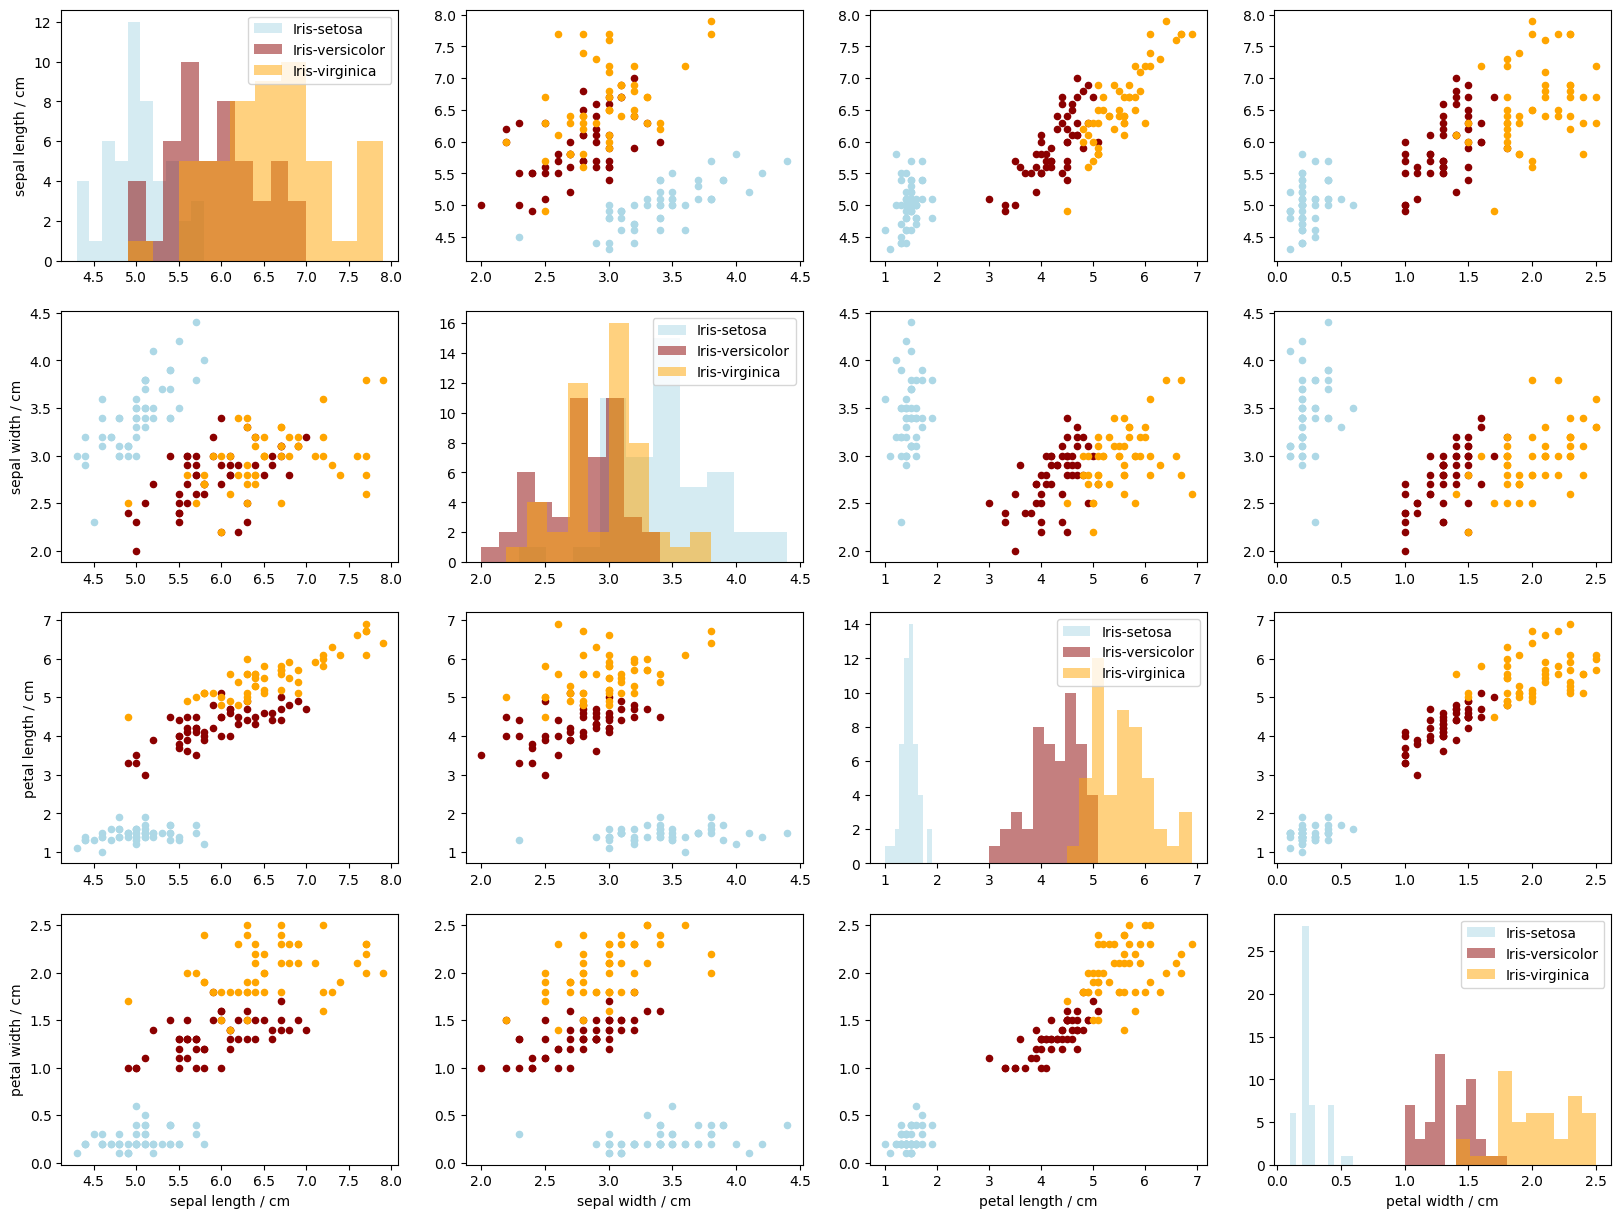

In [27]:
fig, axes = plt.subplots(
    4, 4, figsize=(20, 15)
)  # petal - Bluetenblatt; sepal - Kelchblatt
structured_multigrid_plot(df, axes)

Get row with specific *index value*. Remember that index values must be contained in `df.index`.

In [28]:
df.loc[0]

sepal length            5.1
sepal width             3.5
petal length            1.4
petal width             0.2
Name            Iris-setosa
Name: 0, dtype: object

Get rows with slicing:

In [29]:
df.loc[0::4].head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa


Get rows with fancy indexing:

In [30]:
df.loc[[0, 4, 8, 12, 16]]

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa


We can also access whole columns with the `loc` method:

In [31]:
df.loc[ :, ['petal length', 'petal width']].head()
# Does not work with `iloc` method (since it wants `int` values).

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [32]:
# This is the same as
df[["petal length", "petal width"]].head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Boolean masks can also be used with `.loc`:

In [33]:
df.loc[df["Name"] == "Iris-setosa"].head()
# This is the same as
# df[df["Name"] == "Iris-setosa"].head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are situations where using `[]` and `loc[]` actually are semantically different.

Suppose we want to alter some values inside a `DataFrame`. We want to limit the changes to certain rows and columns.

In [34]:
# This is a working copy.
df_tmp = df.copy()
df_tmp.head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The followiong is an example for "chained indexing".
This calls (df_tmp.__getitem__(slice(1, 3, 1))).__setitem__("sepal length",  -1000.0)

This will yield a warning. We have *no guarantees* that this will return a view such that the assignment will succeed. It cannot be easily predicted if we obtain a copy or a view. It depends on the mem-layout of the data inside the `DataFrame`. Pandas does not make any guarantees which mem-layout we actually have.

In [35]:
df_tmp[1:3]["sepal length"] = -1000.0
df_tmp.head()

/tmp/ipykernel_7009/966426566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[1:3]["sepal length"] = -1000.0


,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This is a better way of handling the assignment. This calls `df_tmp.loc.__setitem__(slice(1, 3, 1), "sepal length")` and allows to deal with the assignment in single step (just *one* function call instead of two function calls).

In [36]:
df_tmp.loc[1:3, "sepal length"] = -1000.0
df_tmp.head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,-1000.0,3.0,1.4,0.2,Iris-setosa
2,-1000.0,3.2,1.3,0.2,Iris-setosa
3,-1000.0,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For more details on the difference between using `[]` and the `loc` method see [this link](https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte#52919794).

We can also use combined boolean masks:

In [37]:
boolean_mask = (df["sepal length"] > 6.0) & (df["petal length"] > 1.0)
df.loc[boolean_mask].head()

,sepal length,sepal width,petal length,petal width,Name
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor


#### 1.1.4  A word on views

Let's generate a DataFrame for some experiments:

In [38]:
df = pd.DataFrame(np.random.randint(0, 20, (4, 2)), columns=list("AB"))
df

,A,B
0,4,6
1,17,5
2,1,7
3,11,4


Get a view on a slice of data:

In [39]:
df_slice = df.loc[1:3, :]
df_slice

,A,B
1,17,5
2,1,7
3,11,4


Change a value:

In [40]:
df.loc[1, "A"] = -1000
df

,A,B
0,4,6
1,-1000,5
2,1,7
3,11,4


Is this change visible from the slice?

In [41]:
df_slice

,A,B
1,-1000,5
2,1,7
3,11,4


Make another change. But this time we change the dtype of the value

In [42]:
df.loc[1, "A"] = -999.99
df  # Note how *all* value in column "A" are now `float`s.

,A,B
0,4.00,6
1,-999.99,5
2,1.00,7
3,11.00,4


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 192.0 bytes


What about the slice? Can we see this change as well?

In [44]:
df_slice

,A,B
1,-1000,5
2,1,7
3,11,4


The column `"A"` of the original `DataFrame` is a Pandas `Series` object with `dtype = int64`. When we replace a value from this `Series` with a value which is also of type `int64` (or another integer type) the change with also be visible from the view.

If we try to place a `float` value inside this `Series` the value is not converted into a `int64` but rather a new `float` array is generated. The `float` array contains all of the original values as `flaot`s and the new value. The `float` array replaces the array inside the `Series` with column index `"A"`.

### 1.2 Reading data into a `DataFrame`

Pandas can import several common file formats:

- `pd.read_csv`: Read in CSV spreadsheets (`.csv` suffix)
- `pd.read_excel`: Read in MS Office spreadsheets (`.xls` and `.xlsx` suffix) 
- `pd.read_stata`: Read stata datasets (`.dta` suffix)
- `pd.read_hdf`: Read HDF datasets (`.hdf` suffix)
- `pd.read_sql`: Read from SQL database

Other file formats are [supported](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) as well.

#### 1.2.1 Reading from a CSV file

A very common way to generate a `DataFrame` is to read data from an external file. CSV files can be parsed with Pandas convenience function [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

Read the file with Pandas and specify the delimiter symbol as well as the a symbol for the comment:

In [45]:
pd.read_csv("iris-data.csv", delimiter=";", comment='#').head()

# original CSV-File from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# reformated for our use

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can limit the number of imported columns by specifying those that we explicitly want to have.

In [46]:
df_iris = pd.read_csv(
    "iris-data.csv",
    delimiter=";",
    comment="#",
    usecols=["Name", "sepal length", "sepal width"],
)
df_iris.head()

,sepal length,sepal width,Name
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


#### 1.2.2 Playing with the index

`DataFrames` offer multiple methods for altering the Index. Some of them are:

- [`df.reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html): Reset the index and use default index.
- [`df.set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html): Set the index  using an existing column.
- [`df.reindex()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html): Change current index with additional filling logic.

In [47]:
# Download IRIS dataset
df = pd.read_csv('iris.data', names=["sepal length", "sepal width", "petal length", "petal width", "Name"])

# Quick check if data looks alright
df.head()
#df.index

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Discard the current index and use default indexing scheme. The index will be made a regular column:

In [48]:
df.reset_index().head()  # By default this returns a new object (inplace=False)

,index,sepal length,sepal width,petal length,petal width,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


We can select another column as our index:

In [49]:
df_new = df.set_index("Name")  # By default this returns a new object (inplace=False).
df_new.head()

,sepal length,sepal width,petal length,petal width
Name,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


In [50]:
 df_new.loc["Iris-versicolor"].head()

,sepal length,sepal width,petal length,petal width
Name,,,,
Iris-versicolor,7.0,3.2,4.7,1.4
Iris-versicolor,6.4,3.2,4.5,1.5
Iris-versicolor,6.9,3.1,4.9,1.5
Iris-versicolor,5.5,2.3,4.0,1.3
Iris-versicolor,6.5,2.8,4.6,1.5


In [51]:
# the same inplace
df.set_index("Name", inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width
Name,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


Example with student grades:

In [52]:
math_grades = {
    'stud1': 15,
    'stud2': 11,
    'stud3': 9,
    'stud4': 13,
    'stud5': 12,
    'stud6': 7,
    'stud7': 14,
}
chemistry_grades = {
    'stud1': 10,
    'stud2': 14,
    'stud3': 12,
    'stud4': 8,
    'stud5': 11,
    'stud6': 10,
    'stud7': 12,
}

df_grades = pd.DataFrame(
    {"math": pd.Series(math_grades), "chemistry": pd.Series(chemistry_grades)}
)

df_grades

,math,chemistry
stud1,15,10
stud2,11,14
stud3,9,12
stud4,13,8
stud5,12,11
stud6,7,10
stud7,14,12


We can change the index of the `DataFrame` to add additional rows:

In [53]:
new_index = list(math_grades.keys()) + ["stud8", "stud9"]

df_grades.reindex(new_index, copy=True)
# As long as copy=False (default: True) a new object is returned.

,math,chemistry
stud1,15.0,10.0
stud2,11.0,14.0
stud3,9.0,12.0
stud4,13.0,8.0
stud5,12.0,11.0
stud6,7.0,10.0
stud7,14.0,12.0
stud8,NaN,NaN
stud9,NaN,NaN


In [54]:
# We can also choose a specific value to fill into places that orginate from introducing a new index.
df_grades.reindex(new_index, fill_value="missing", copy=True)

,math,chemistry
stud1,15,10
stud2,11,14
stud3,9,12
stud4,13,8
stud5,12,11
stud6,7,10
stud7,14,12
stud8,missing,missing
stud9,missing,missing


#### 1.2.3 Performance implications of the `inplace` argument

Create a huge field of data for testing:

In [55]:
import string

column_names = list(string.ascii_lowercase)
N_rows, N_columns = 500_000, len(column_names)
data = np.ones((N_rows, N_columns))
index = range(N_rows)

pd.DataFrame(data=data, index=index, columns=column_names)


,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
499996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
499997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
499998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Test the performance difference between inplace and not-inplace :

In [56]:
def reset_index_of_DataFrame(index, data, colnames, inplace=False):
    df = pd.DataFrame(data=data, index=index, columns=colnames)
    df.reset_index(inplace=inplace)
    del df

In [57]:
%timeit reset_index_of_DataFrame(index, data, column_names, inplace=False)
%timeit reset_index_of_DataFrame(index, data, column_names, inplace=True)

100 ms ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
814 µs ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The `inplace` argument is available for many methods that operate on `DataFrames`. For performance and memory efficiency reasons, it may be a good idea to pass `inplace=True`  to these methods.

Please be aware that this change will persist and will possibly influence future calls to other functions and methods.

Please always refer to the documentation of the method of interest and check the availability and the relevance of the `inplace` argument.

### 1.3 Task

##### **1.**  Erstellen Sie basierend auf den beiden folgenden Listen auf verschiedene Arten einen `pd.DataFrame`. Die Namen der Spalten sollen dabei `"Zufallszahlen"` (für `values1`) und `"Countdown"` (für `values2`) sein.

In [58]:
values1 = np.random.randint(-10, 10, size=5)
values2 = range(5, 0, -1)

##### **2.**  Gegeben sind die beiden folgenden `pd.Series`. Konstruieren Sie aus diesen einen `pd.DataFrame` mit den Spaltennamen `"alles"` (für `s1`) und `"gerade Zahlen"` (für `s2`). Ersetzen Sie die dabei auftretenden `NaN` Werte mit `0`.

In [59]:
s1 = pd.Series(data=range(5), index=list('abcde'))
s2 = pd.Series(data=range(0, 10, 2), index=list('acegi'))

##### **3.**  Wir laden den Iris-Datensatz mit Maßen verschiedener Pflanzen herunter:

In [60]:
#df_iris = pd.read_csv(
#    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#    names=["sepal length", "sepal width", "petal length", "petal width", "Name"],
#)

df_iris = pd.read_csv('iris.data', names=["sepal length", "sepal width", "petal length", "petal width", "Name"])
df_iris.head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### **4.**  Greifen Sie auf die Spalten `"sepal length`", `"petal width"` und `"Name"` gleichzeitig auf zwei verschiedene Arten zu.

##### **5.** Die Messungen zu `"Iris-setosa"` sind leider unbrauchbar. Ändern Sie alle Einträge in `df_tmp1` und `df_tmp2` mit Messdaten zur Untergattung `"Iris-setosa"` auf `nan` (nicht aber die Spalte mit dem Eintrag `"Iris-setosa"`). Nutzen Sie einmal sequenzielles Indizieren (`[cols][rows]`) und einmal die `.loc`-Methode. Prüfen Sie anschließend, ob die Änderungen jeweils wirksam geworden sind.

In [61]:
df_tmp1 = df_iris.copy(deep=True)
df_tmp2 = df_iris.copy(deep=True)

##### **6.** Stellen Sie die Verteilung der Messwerte separat in Histogrammen dar. Achten Sie auf Achsenbeschriftung und inbesondere auf Angabe der Einheiten. Wie verändern sich die Abbildungen, wenn Sie die Anzahl der `bins` verändern?

## 2  `DataFrame`s: Operations

### 2.1  Arithmetic operations on `DataFrame`s

#### Mapping between Python operators and Pandas methods

| Python operator | Pandas methods                   |
|:---------------:|----------------------------------|
|       `+`       | `add()`                          |
|       `-`       | `sub()`, `subtract()`            |
|       `*`       | `mul()`, `multiply()`            |
|       `/`       | `truediv()`, `div()`, `divide()` |
|       `//`      | `floordiv()`                     |
|       `%`       | `mod()`                          |
|       `**`       | `pow()`                          |

In [62]:
A = pd.DataFrame(np.random.randint(0, 20, (3, 2)), columns=list("AB"))
B = pd.DataFrame(np.random.randint(0, 20, (3, 3)), columns=list("BAC"))

In [63]:
A

,A,B
0,10,0
1,19,8
2,9,19


In [64]:
B

,B,A,C
0,15,10,12
1,13,3,8
2,4,17,9


Indices are aligned, no matter what the order is in both `DataFrame`s.

In [65]:
A + B

,A,B,C
0,20,15,NaN
1,22,21,NaN
2,26,23,NaN


The number of columns do not match. We use `fill_value` to to be used inplace for the missing values:

In [66]:
A.add(B, fill_value=0)

,A,B,C
0,20,15,12.0
1,22,21,8.0
2,26,23,9.0


NumPy broadcasting rules apply for `DataFrame`s as well.

In [67]:
df = pd.DataFrame(np.random.randint(10, size=(3, 4)), columns=list("wxyz"))
df

,w,x,y,z
0,0,1,3,8
1,5,3,4,9
2,7,6,6,4


Row-wise operations are the default.

In [68]:
df - df.loc[0]

,w,x,y,z
0,0,0,0,0
1,5,2,1,1
2,7,5,3,-4


We can use the `axis` argument if we want to operate on the columns.

In [69]:
df.sub(df["x"], axis=0)

,w,x,y,z
0,-1,0,2,7
1,2,0,1,6
2,1,0,0,-2


Indices will be aligned for these kind of operations. This means that data context is maintained which helps avoiding uncessary errors.

In [70]:
df_slice = df.loc[0, ::2]
df_slice

w    0
y    3
Name: 0, dtype: int64

In [71]:
df - df_slice

,w,x,y,z
0,0.0,NaN,0.0,NaN
1,5.0,NaN,1.0,NaN
2,7.0,NaN,3.0,NaN


We can apply NumPy Ufuncs to a `DataFrame` object as well:

In [72]:
np.exp(df)

,w,x,y,z
0,1.000000,2.718282,20.085537,2980.957987
1,148.413159,20.085537,54.598150,8103.083928
2,1096.633158,403.428793,403.428793,54.598150


Adding columns based on arithmetic with existing columns

In [73]:
df["asdf"] = np.sin(df["x"] * df["y"])
df

,w,x,y,z,asdf
0,0,1,3,8,0.141120
1,5,3,4,9,-0.536573
2,7,6,6,4,-0.991779


### 2.2 `agg()`, `apply()` , `applymap()` and `transform()`

Pandas `DataFrame` and `Series` objects have several built-in method to operate on the data.

- `agg()`: available for *both* `Series` and `DataFrame` objects
- `apply()`: available for *both* `Series` and `DataFrame` objects
- `transform()`: available for *both* `Series` and `DataFrame` objects
- `applymap()` *only* available for `DataFrame` objects
- `map()`: *only* available for `Series` objects

*Note*: In what follows we will only deal with  `agg()`, `apply()`, `applymap()` and `transform()`.

In [74]:
#df_iris = pd.read_csv(
#    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#    names=["sepal length", "sepal width", "petal length", "petal width", "Name"],
#)

df_iris = pd.read_csv('iris.data', names=["sepal length", "sepal width", "petal length", "petal width", "Name"])
df_iris.head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# Get a subset of the data columns
data_columns = df_iris.columns[:-1]
data_columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

#### [`agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)

```python
DataFrame.agg(func=None, axis=0, *args, **kwds)
```
- *applies* a function (callable) along an `axis` of the `DataFrame`
    - `axis=0`: `func` is applied to each column (a `Series` object). This is the default!
    - `axis=1`: `func` is applied to each row
- return type is inferred from `func`

This method performs aggregation operations along a specified axis of a `DataFrame`. It can be passed multiple functions, e.g. in `list`.

The return can be:
 - scalar : when Series.agg is called with single function
 - Series : when DataFrame.agg is called with a single function
 - DataFrame : when DataFrame.agg is called with several functions

In [76]:
df_iris[data_columns].agg(['sum', 'max', 'min'])

,sepal length,sepal width,petal length,petal width
sum,876.5,458.1,563.8,179.8
max,7.9,4.4,6.9,2.5
min,4.3,2.0,1.0,0.1


In [77]:
df_iris[data_columns].agg(['sum', 'max', 'min'], axis=1)

,sum,max,min
0,10.2,5.1,0.2
1,9.5,4.9,0.2
2,9.4,4.7,0.2
3,9.4,4.6,0.2
4,10.2,5.0,0.2
...,...,...,...
145,17.2,6.7,2.3
146,15.7,6.3,1.9
147,16.7,6.5,2.0
148,17.3,6.2,2.3


In [78]:
df_iris[data_columns].agg([np.mean, np.std], axis=0)

,sepal length,sepal width,petal length,petal width
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161


#### [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

```python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
```
- *applies* a function (callable) along an `axis` of the `DataFrame`
    - `axis=0`: `func` is applied to each column (a `Series` object). This is the default!
    - `axis=1`: `func` is applied to each row
- return type is inferred from `func`

The return type of `func` determines the form of the result.

`func` can operate on `Series` objects an perform operations that are supported by these types of objects (e.g. by means of the methods `.min()`, `.max()` or `.mean()`). 
- result can be a scalar value (e.g. `.sum()` which is an aggregation operation)
- result can be another `Series` object

`func` must not be a agg

In [79]:
# Operate on columns (axis=0): `x` inside the `lamdba` function are `Series` objects!
result = df_iris[data_columns].apply(lambda x: x.mean(), axis=0)
print(f"The type of the output is {type(result)}")
result

The type of the output is <class 'pandas.core.series.Series'>


sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [80]:
# Operate elementwise along all values in a row (axis=1).  The return type is another `DataFrame`.

# This converts the units of all measured values from cm to mm.
df_iris[data_columns].apply(lambda x: x * 10, axis=1).head()

,sepal length,sepal width,petal length,petal width
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0


As an example for using the `agg()` and `apply()` functions we normalise the features (data_columns) of the IRIS dataset and plot the distributions.

In [81]:
# Specify color encoding of the different flower species.
name_to_color = {
    'Iris-setosa': "lightblue",
    'Iris-versicolor': "darkred",
    'Iris-virginica': "orange",
}

In [82]:
def plot_raw(axes, df, data_columns):
    for idx, (ax, f) in enumerate(zip(axes, data_columns)):
        for name in df["Name"].unique():
            df[df["Name"] == name][f].plot.kde(ax=ax, color=name_to_color.get(name))
        ax.set_xlabel(f + " / cm")


def plot_normalised(axes, df, data_columns):
    df_agg = df[data_columns].agg(["mean", "std"])
    df_normalised = df[data_columns].apply(
        lambda x: (x - df_agg.loc["mean"]) / df_agg.loc["std"], axis=1
    )
    #     print(df_normalised.describe())
    for idx, (ax, f) in enumerate(zip(axes, data_columns)):
        for name in df["Name"].unique():
            df_normalised[df["Name"] == name][f].plot.kde(
                ax=ax, color=name_to_color.get(name)
            )
        ax.set_xlabel(f + " (normalised)")


def adjust_xscale(axes):
    from functools import reduce
    from math import ceil, floor

    xmin, xmax = reduce(
        lambda a, b: (min(a[0], b[0]), max(a[1], b[1])),
        (ax.get_xlim() for ax in axes),
        (1000, -1000),
    )
    xmin, xmax = floor(xmin), ceil(xmax)
    for ax in axes:
        ax.set_xticks(range(xmin, xmax + 1, 2))
        ax.set_xticklabels(range(xmin, xmax + 1, 2))
        ax.set_xlim((0.9 * xmin, 1.05 * xmax))

In [83]:
def plot_distributions(df):
    fig, axes = plt.subplots(2, len(data_columns), figsize=(20, 10))

    # plot data as-is
    plot_raw(axes[0, :], df_iris, data_columns)
    # plot normalised data
    plot_normalised(axes[1, :], df_iris, data_columns)
    # adjust the x scale for the raw data
    adjust_xscale(axes[0, :])

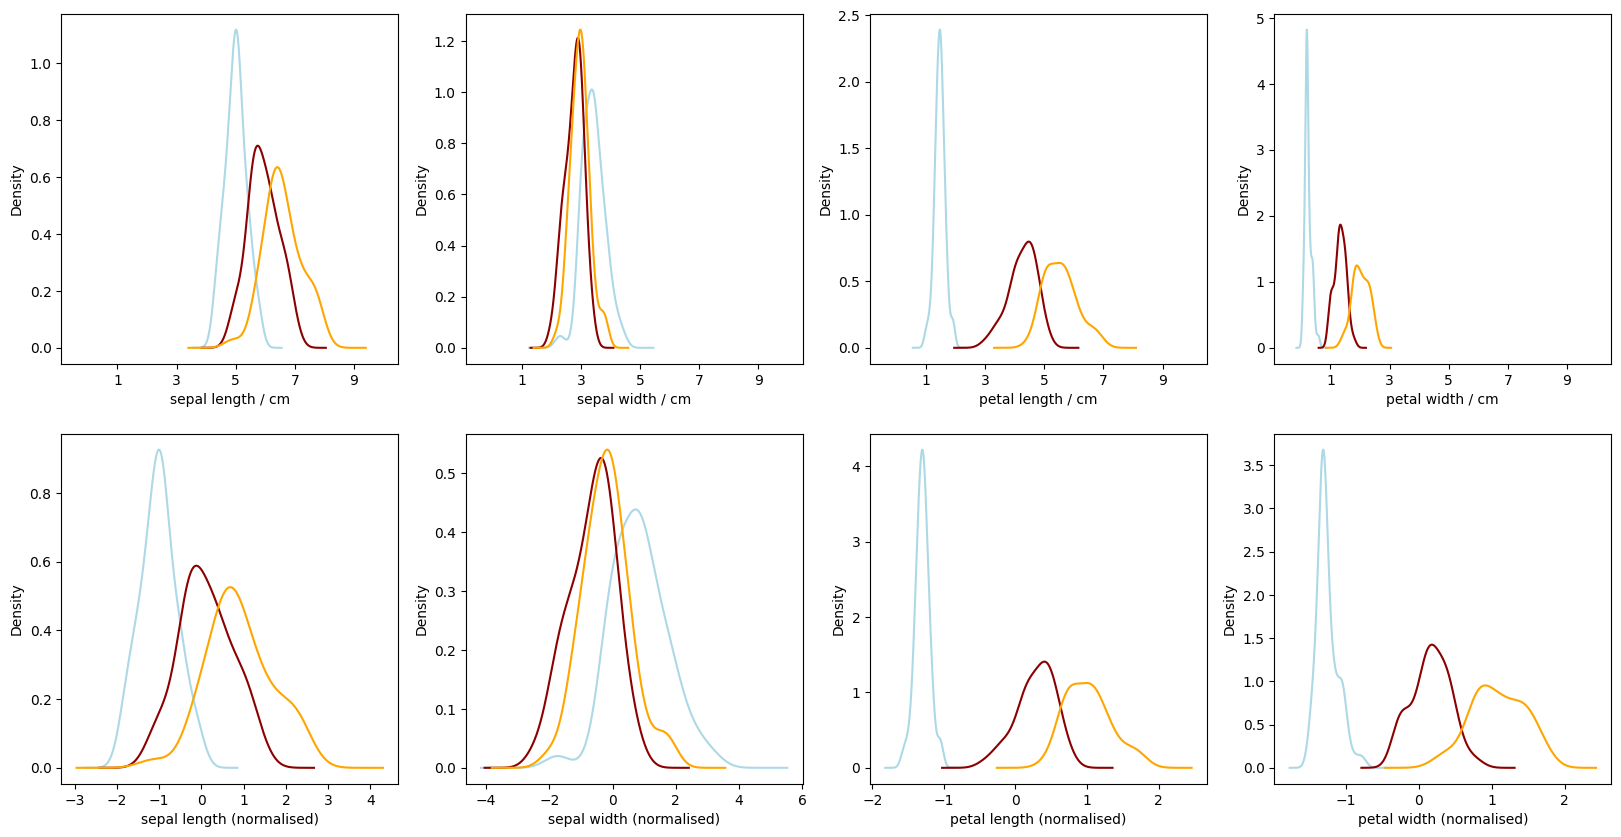

In [84]:
plot_distributions(df_iris)

#### Experiment: What happens when operating with `apply`?

In [85]:
N_rows, N_cols = 10_000, 500
df = pd.DataFrame(
    np.random.random((N_rows, N_cols)), columns=[f"col{idx}" for idx in range(N_cols)]
)

In [86]:
# Benchmark: Operate along the columns (axis=0) vs operating along the rows (axis=1)
%timeit df.apply(lambda x: x ** 2, axis=0)
%timeit df.apply(lambda x: x ** 2, axis=1)

124 ms ± 5.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
858 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
def dummy(x):
    """Dummy function to showcase how `apply` operates."""
    # Some code is needed here.
    print(type(x), x.shape)
    return x - x.mean()


df = pd.DataFrame(np.random.random((5, 3)))
df

,0,1,2
0,0.748281,0.344737,0.593524
1,0.335482,0.832072,0.542928
2,0.543025,0.067546,0.111207
3,0.085116,0.100327,0.623407
4,0.153917,0.353682,0.224320


In [88]:
df.apply(dummy, axis=0)  # apply along the columns

<class 'pandas.core.series.Series'> (5,)
<class 'pandas.core.series.Series'> (5,)
<class 'pandas.core.series.Series'> (5,)


,0,1,2
0,0.375117,0.005064,0.174447
1,-0.037682,0.492399,0.123850
2,0.169860,-0.272127,-0.307870
3,-0.288048,-0.239345,0.204329
4,-0.219247,0.014009,-0.194757


In [89]:
df.apply(dummy, axis=1)  # apply along the rows

<class 'pandas.core.series.Series'> (3,)
<class 'pandas.core.series.Series'> (3,)
<class 'pandas.core.series.Series'> (3,)
<class 'pandas.core.series.Series'> (3,)
<class 'pandas.core.series.Series'> (3,)


,0,1,2
0,0.186100,-0.217444,0.031344
1,-0.234679,0.261911,-0.027233
2,0.302432,-0.173047,-0.129385
3,-0.184501,-0.169289,0.353790
4,-0.090056,0.109709,-0.019653


#### `applymap()`

```python
DataFrame.applymap(func, na_action=None)
```

- `func` is applied to each element in the `DataFrame`
- `func` is supposed to return a scalar values as well
- return type of `applymap()` is another (modified) `DataFrame`

In [90]:
# We repeat the simple example of changing the units of the measured data from cm to mm.
df_iris[data_columns].applymap(lambda x: x * 10).head()

,sepal length,sepal width,petal length,petal width
0,51.0,35.0,14.0,2.0
1,49.0,30.0,14.0,2.0
2,47.0,32.0,13.0,2.0
3,46.0,31.0,15.0,2.0
4,50.0,36.0,14.0,2.0


#### `transform()`

```python
DataFrame.transform(func, axis=0, *args, **kwargs)
```

`func` can either be
- callable, e.g. `np.exp`
- list-like, e.g. `[np.sin, np.cos]`
- dict-like, e.g. `{"sepal length": np.sin,  "petal length": np.cos}`. Application is limited to columns names passed as keys to `dict`.
- string, e.g. `"sqrt"`

*Note*: This function *transforms*, i.e, when the input value is `Series` another (transformed) `Series` is returned. Returning a scalar value is not valid (resulting error message will be: `ValueError: Function did not transform
`)

In [91]:
df_iris[data_columns].transform({"sepal length": np.cos, "petal length": np.sin}).head()

,sepal length,petal length
0,0.377978,0.985450
1,0.186512,0.985450
2,-0.012389,0.963558
3,-0.112153,0.997495
4,0.283662,0.985450


### 2.3 Performance considerations

When operating on columns of a `DataFrame` or a `DataFrame` as a whole it is oftentimes faster to use a vectorised operations instead of column-/row-wise operations.

In [92]:
df = pd.DataFrame(np.random.randn(100000, 3), columns=list("abc"))

In [93]:
%timeit df.apply(lambda x: x ** 2)
%timeit df.applymap(lambda x: x ** 2)
%timeit df ** 2
%timeit (df.values ** 2)

1.07 ms ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
55.7 ms ± 881 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
238 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
168 µs ± 815 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### 2.4 Grouping data

Oftentimes items in a dataset can be grouped in a certain manner (e.g., if a column contains a value multiple times). The IRIS dataset, for instance, can  be grouped according the species of each flower.

```python
my_dataframe.groupby(by=["<column label>"])
```
The `DataFrame` is split and entries are grouped according to the values in the column with `"<column-label>"`. Once the data  has been grouped operations can be conducted on the items of each group.

*Note*: `DataFrame`s cannot only be [grouped](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) according to the entries of a column.

The return type of `groupby()` is *not* another `DataFrame` but rather a `DataFrameGroupBy` object. We can imagine this object to be a grouping of multiple `DataFrame`s.

It is important to understand that such an object essentially is a special *view* on the original `DataFrame`. No computations have been carried out when generating it (lazy evaluation).

#### 2.4.1 `GroupBy` objects

In [94]:
#df_iris = pd.read_csv(
#    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
#    names=["sepal length", "sepal width", "petal length", "petal width", "Name"],
#)

df_iris = pd.read_csv('iris.data', names=["sepal length", "sepal width", "petal length", "petal width", "Name"])
df_iris.head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We group the data according to the species of the flowers:

In [95]:
grouped_by_species = df_iris.groupby(by=["Name"])

The output of the `DataFrame.groupby()`  method is *not* another `DataFrame`

In [96]:
print(type(grouped_by_species))
print(grouped_by_species)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


This data structure still knows about the `columns` that were present in the original `DataFrame`. We can use the `[<column-name>]` operation to access the columns with the correspoding label in each of the group members (subframes).

In [97]:
# This does *not* return a `DataFrame`
grouped_by_species["sepal length"]

We can perform several types of aggregations on this data structure. Pandas will access the corresponding column of all subframes and apply the functions passed to the `agg()` method.

In [98]:
grouped_by_species["sepal length"].agg([np.min, np.mean, np.max])

,amin,mean,amax
Name,,,
Iris-setosa,4.3,5.006,5.8
Iris-versicolor,4.9,5.936,7.0
Iris-virginica,4.9,6.588,7.9


#### Access the groups contained inside `DataFrameGroupBy`

We can iterate over the `DataFrameGroupBy` object where each subframe is returned as a `Series` of a `DataFrame`.

In [99]:
for (species, subframe) in grouped_by_species:
    print(f"{species} subframe has shape = {subframe.shape}")

('Iris-setosa',) subframe has shape = (50, 5)
('Iris-versicolor',) subframe has shape = (50, 5)
('Iris-virginica',) subframe has shape = (50, 5)


With `get_group` we can choose the subframe to obtain a `DataFrame`.

In [100]:
grouped_by_species.get_group("Iris-setosa").head()

,sepal length,sepal width,petal length,petal width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Dispatch

Methods that are not directly implemented for the `DataFrameGroupBy` object are passed to the subframes and executed on these.

In [101]:
grouped_by_species["sepal length"].describe()  # The return type is a `DataFrame`

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


The `describe()` method can also be called on the full object but the output would be rather hard to view.

In [102]:
grouped_by_species.describe()

sepal length                                               
                       count   mean       std  min    25%  50%  75%  max   
Name                                                                       
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8  \
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width          
                      count   mean  ...          75%  max       count   mean   
Name                                ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244  \
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
Name                                                
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Single methods are available as well. E.g. `mean()`, `std()` or `sum()`

In [103]:
grouped_by_species.mean()  # The return type is a `DataFrame`

,sepal length,sepal width,petal length,petal width
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


#### Plotting

It also provides a convenient way to plot data for comparison.

Name
Iris-setosa        Axes(0.125,0.11;0.775x0.77)
Iris-versicolor    Axes(0.125,0.11;0.775x0.77)
Iris-virginica     Axes(0.125,0.11;0.775x0.77)
Name: sepal length, dtype: object

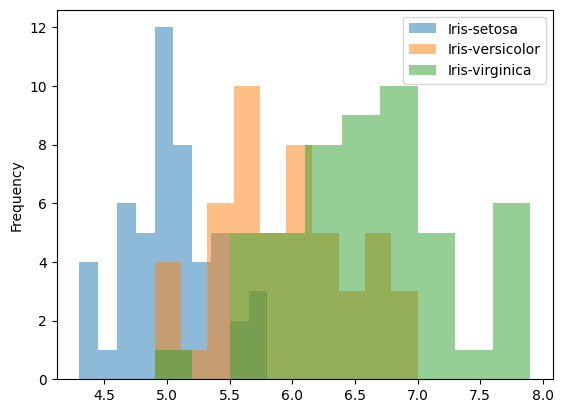

In [104]:
_, ax = plt.subplots()
ax.set_xlabel("sepal length / cm")
grouped_by_species["sepal length"].plot.hist(alpha=0.5, ax=ax, legend=True)

### 2.5 Aggregate, filter, transform, apply

`DataFrameGroupBy` object support `aggregate()`, `filter()`, `transform()` and `apply()` operations.

These methods can be efficiently used to implement a great variety of operations on grouped data.

#### [`aggregate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) (or simply `agg()`)

```python
DataFrameGroupBy.aggregate(func=None, *args, engine=None, 
                           engine_kwargs=None, **kwargs)
```

`func` can for example be ...
- ... function (Python callable),
- ... a string specifiying a function name (e.g. `"mean"`)
- ...  list of functions or strings, e.g. `["std", np.mean]`
- ... `dict` of column labels and function to apply (e.g. `{'data1': np.mean}`)

Perform some common aggegrations within each subframe. The output of this method is another `DataFrame`.

In [105]:
group_agg = grouped_by_species.agg([np.min, np.max, np.mean, np.std])
group_agg

sepal length                       sepal width               
                        amin amax   mean       std        amin amax   mean   
Name                                                                         
Iris-setosa              4.3  5.8  5.006  0.352490         2.3  4.4  3.418  \
Iris-versicolor          4.9  7.0  5.936  0.516171         2.0  3.4  2.770   
Iris-virginica           4.9  7.9  6.588  0.635880         2.2  3.8  2.974   

                          petal length                       petal width        
                      std         amin amax   mean       std        amin amax   
Name                                                                            
Iris-setosa      0.381024          1.0  1.9  1.464  0.173511         0.1  0.6  \
Iris-versicolor  0.313798          3.0  5.1  4.260  0.469911         1.0  1.8   
Iris-virginica   0.322497          4.5  6.9  5.552  0.551895         1.4  2.5   

                                  
                  mean       std  
Name                              
Iris-setosa      0.244  0.107210  
Iris-versicolor  1.326  0.197753  
Iris-virginica   2.026  0.274650

To understand this a bit better consider the following. Note that we limit the output to only one species.

In [106]:
df_iris[df_iris.columns[:-1]].loc[df_iris["Name"] == "Iris-setosa"].agg(
    [np.min, np.max, np.mean, np.std]
)

,sepal length,sepal width,petal length,petal width
amin,4.30000,2.300000,1.000000,0.10000
amax,5.80000,4.400000,1.900000,0.60000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721


The resulting output looks somewhat complicated than what we are used to from `DataFrame`s so far. The column labels now are hierarchical due to the grouping.

In [107]:
group_agg.columns

MultiIndex([('sepal length', 'amin'),
            ('sepal length', 'amax'),
            ('sepal length', 'mean'),
            ('sepal length',  'std'),
            ( 'sepal width', 'amin'),
            ( 'sepal width', 'amax'),
            ( 'sepal width', 'mean'),
            ( 'sepal width',  'std'),
            ('petal length', 'amin'),
            ('petal length', 'amax'),
            ('petal length', 'mean'),
            ('petal length',  'std'),
            ( 'petal width', 'amin'),
            ( 'petal width', 'amax'),
            ( 'petal width', 'mean'),
            ( 'petal width',  'std')],
           )

We can also select which operations to apply on specific columns.

In [108]:
grouped_by_species.agg({"sepal length": np.mean, "petal length": np.median})

,sepal length,petal length
Name,,
Iris-setosa,5.006,1.50
Iris-versicolor,5.936,4.35
Iris-virginica,6.588,5.55


#### [`filter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html)

A filtering operation allows to select/drop data based on certain criteria.

```python
DataFrameGroupBy.filter(func, dropna=True, *args, **kwargs)
```

- `func` must be applicable to a `DataFrame`.
- `func` should have a `bool`ean return type and hence should either return `True` or `False`

The argument of the callable passed to `filter` can be treated like a regular `DataFrame` object.

From all subframes we select only those with mean value of 'sepal length' > threshold. The return type of the `filter` function is a `DataFrame` object. The grouping is dropped.

In [109]:
grouped_by_species.filter(lambda x: x["sepal length"].mean() > 6).head()

,sepal length,sepal width,petal length,petal width,Name
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


#### [`transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html)

```python
DataFrameGroupBy.transform(func, *args, engine=None, engine_kwargs=None, **kwargs)
```

Transformations return a modified version of  the original `DataFrame` with transformed values.

`func` is applied to each subframe (operating at one `Series` at a time).

As an example we center each of the data on the group-wise mean value.

<Axes: ylabel='Density'>

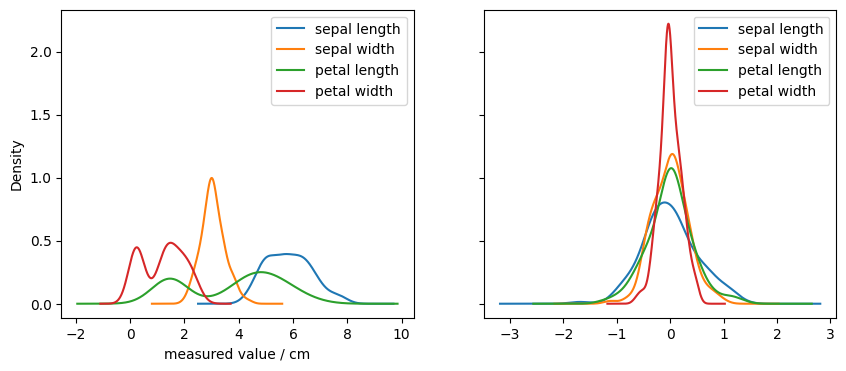

In [110]:
def center_on_mean(x):
    return x - x.mean()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.set_xlabel("measured value / cm")
df_iris.plot.kde(ax=ax1)
(grouped_by_species.transform(center_on_mean)).plot.kde(ax=ax2)

#### [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html)

```python
GroupBy.apply(func, *args, **kwargs)
```

`func` must take a `DataFrame` as argument and return a `DataFrame`, a `Series` or a scalar. The final result will be combined into a `DataFrame` or a `Series` object.

In [111]:
def compute_df_mean(x):
    print(type(x))  # The input datatype is a `DataFrame`
    x = x.mean()
    print(type(x))  # Returns a `Series` object
    x = x.mean()
    print(type(x))  # Returns a scalar
    return x


species_all_mean = grouped_by_species.apply(compute_df_mean)
print(f"The output type of the `apply()` operation is: {type(species_all_mean)}")
species_all_mean

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
The output type of the `apply()` operation is: <class 'pandas.core.series.Series'>


Name
Iris-setosa        2.533
Iris-versicolor    3.573
Iris-virginica     4.285
dtype: float64

### 2.6 Task

##### **1.** Sehen Sie sich den "Titanic"-Datensatz an. Importieren diesen in einen `pd.DataFrame` mit dem Namen `df_titanic`. Importieren Sie nur die  Spalten `"class"`, `"age"`, `"sex"` und `"survived"`.

##### **2.** Welche Einträge gibt es in den Spalten `"class"` und `"age"`?

##### **3.** Wie hoch war die Überlebensrate erwachsener Passagiere der ersten, zweiten bzw. dritten Klasse? Nutzen Sie dazu unterschiedliche Ansätze, und zwar:

- Selektion der passenden Werte mit `bool`eschen Masken

- Gruppierung von `df_titanic` nach zwei dafür relevanten Spalten

* Anwenden der `apply`-Methode mit einer selbst geschriebenen Funktion `survival_rate` auf die nach `"class"` gruppierten Werte